The data is in fact not consistant with the current H0 as H is actually changeing with time and the data shows a differnts slope between then and now anyway.
The axis with most uncertainty of the graph would likely be distance as our means of measuring it become extremely inaccurate the farther one goes and most velocity is form equations. Though this assumes our redshift AND luminosity measurement is more accurate than distance which often relies on one or both.
Clearly with an accelerating universe there should be a upward concavity to the velocity while slowing expanshion should show downward concavity as acceleration (the rate of incresae or decrease) would be altering over large time scales.

The diatnace below about 1 parsec should be relatively Newtonian while anything larger would need to account for the metric of spacetime and gravitiational distortions to travel path
The derived Hubble equation from d^2a/dt^2 is from the force derivative and r(t) to be 4piG/3*rho*a
The integr

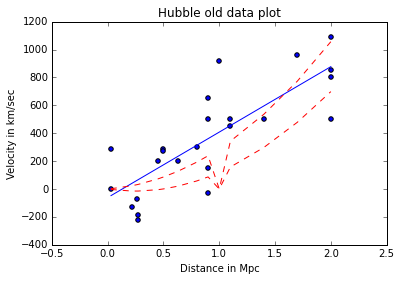

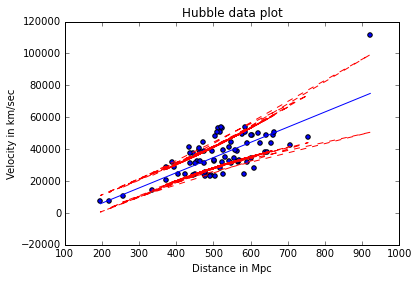

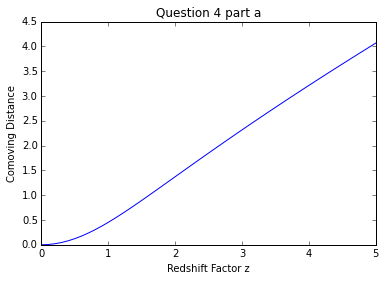

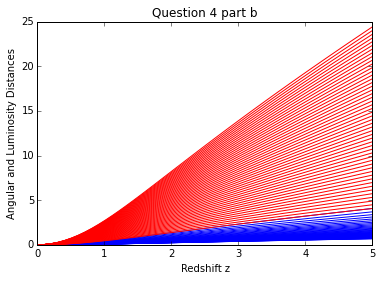

red is Angular while blue is the Luminosity, due to not understanding where my bug is I cannot fix the legend at this time


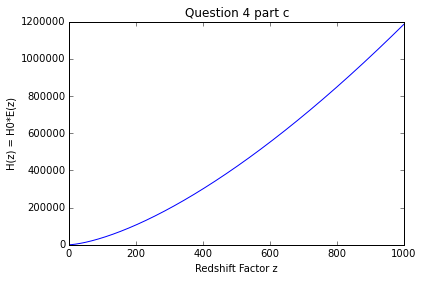

In [14]:
#Physics 154 Assignment 6;  Ha, Cameron R. SID 998511368
#libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy.integrate import odeint

%matplotlib inline

#global constants
c = 3E8

#hubble data 1
#objectH1 = [SMag,LMag,NGC6822,NGC598,NGC221, NGC224,NGC5457,NGC4736,NGC5194,NGC4449,NGC4214,NGC3031,NGC3627,NGC4826,NGC5236,NGC1068,NGC5055,NGC7331,NGC4258,NGC4151,NGC4382,NGC4472,NGC4486,NGC649]
magnitudeH1 = [99,99,99,99,99,99,17,17.3,17.3,17.8,18.3,18.5,18.5,18.5,18.5,18.7,19,19,19.5,20,99,99,99,99]
RH1 = [.032,.03,.214,.263,.275,.275,.45,.5,.5,.63,.8,.9,.9,.9,.9,1,1.1,1.1,1.4,1.7,2,2,2,2]
vH1 = [1.5,290,-130,-70,-185,-220,200,290,270,200,300,-30,650,150,500,920,450,500,500,960,500,850,800,1090]
mtH1 = [0.5,9,7,8.8,5,9.9,8.4,7.4,9.5,11.3,8.3,9.1,9,10.4,9.1,9.6,10.4,8.7,12,10,8.8,9.7,9.5]
MH1 = [-17.2,-12.7,-15.1,-13.4,-17.2,-13.3,-15.1,-16.1,-14.5,-13.2,-16.4,-15.7,-15.7,-14.4,-15.9,-15.6,-14.8,-17.0,-14.2,-16.5,-17.7,-16.8,-17.0]
D_from_mtH1 = [0.03,0.22,0.26,0.28,0.28,0.44,0.50,0.50,0.63,0.79,0.87,0.91,1.00,1.10,1.10,1.38,1.74,2.00,2.00,2.004,2.00]

#hubble data 2
d_H = [455.080262578889,513.423330990469,576.284050479181,585.11253203513,523.505923367395,602.942364857819,621.045758404246,476.040606680382,518.031537285099,510.729566262954,446.168391770437,436.883456944802,584.376038491964,393.309285829825,921.718702915427,521.021446168506,496.377628699792,387.767315447025,438.275506181106,462.326300514848,503.935553915330,564.242766238536,526.152938229947,472.012608766812,591.424620672351,555.874561672524,754.610771264363,256.564402953741,480.330539459983,548.338576155372,373.215266152547,600.944825516626,462.470036516221,624.417404890712,435.124562873535,526.606238840822,542.444362456180,522.329795254029,196.207769174429,548.160326545777,219.392006448455,478.237910284818,492.803064694433,450.219187626743,589.811179401418,641.292853186580,660.366448835543,473.636976393135,565.443999903072,464.765625773623,609.411436308505,663.262433494619,638.234681583160,564.882343204837,371.626949103319,568.232147351329,500.501749625619,450.405204281736,600.286256034905,654.954303351453,474.46633151924,504.101511928981,477.694674884753,542.6817289928,446.202911752882,404.0190098882,643.3851015385,423.741695518756,706.52706001605,582.12788058965,531.371919175265,516.866279977287,500.738057206238,557.191907210439,492.067860569201,335.522307560975]
v_H = [32438.4,53502,49381.2,53794.2,53568.6,48844.2,49990.5,39020.4,50575.2,50916.6,37451.4,37335.6,50627.4,28613.4,111771,53913,39033,31892.7,31508.4,39343.2,48418.2,38887.8,39373.2,44216.1,43655.4,34560,47784.3,10465.5,24314.1,31394.4,20893.2,34483.8,40906.2,43901.1,41482.2,24328.5,41626.2,31828.5,7349.7,44318.7,7496.7,22999.5,23995.8,24180.3,32014.8,48899.7,48982.8,24133.5,32212.5,32488.2,28473.3,50879.7,38084.1,32294.4,28588.8,32940.6,32700.9,31461,48847.5,43787.7,31143,22952.7,25467.9,32814.3,23698.8,24246.3,38095.8,24615,42468.3,24562.8,35012.1,28461.6,33501,39369.3,23451,14546.7]
z_H = [0.108128,0.17834,0.164604,0.179314,0.178562,0.162814,0.166635,0.130068,0.168584,0.169722,0.124838,0.124452,0.168758,0.095378,0.372570,0.179710,0.130110,0.106309,0.105028,0.131144,0.161394,0.129626,0.131244,0.147387,0.145518,0.115200,0.159281,0.034885,0.081047,0.104648,0.069644,0.114946,0.136354,0.146337,0.138274,0.081095,0.138754,0.106095,0.024499,0.147729,0.024989,0.076665,0.079986,0.080601,0.106716,0.162999,0.163276,0.080445,0.107375,0.108294,0.094911,0.169599,0.126947,0.107648,0.095296,0.109802,0.109003,0.10487,0.162825,0.145959,0.10381,0.076509,0.084893,0.109381,0.078996,0.080821,0.126986,0.08205,0.141561,0.081876,0.116707,0.094872,0.11167,0.131231,0.07817,0.048489]

#question 1
print "The data is in fact not consistant with the current H0 as H is actually changeing with time and the data shows a differnts slope between then and now anyway."
print "The axis with most uncertainty of the graph would likely be distance as our means of measuring it become extremely inaccurate the farther one goes and most velocity is form equations. Though this assumes our redshift AND luminosity measurement is more accurate than distance which often relies on one or both."
print "Clearly with an accelerating universe there should be a upward concavity to the velocity while slowing expanshion should show downward concavity as acceleration (the rate of incresae or decrease) would be altering over large time scales.\n"

#question 2 and 3
print "The diatnace below about 1 parsec should be relatively Newtonian while anything larger would need to account for the metric of spacetime and gravitiational distortions to travel path"
print "The derived Hubble equation from d^2a/dt^2 is from the force derivative and r(t) to be 4piG/3*rho*a"
print "The integral gives you (4*pi*G/3)*rho*a**2-Kc**2 according to wolfram but I think you want the (8*pi*G/3)*rho*a**2-Kc**2 from conservation of Energy which was 2*(da/dt)*(d^2a/dt^2) representing the expanding shell via kinetic and potential energy constants" 
print "The just doing sign analysis of the equation K < 0 implies eternal increasing expansion, K = 0 means always expands but to a limited v since v(t0 = sqrt(2GM/r(t) and k > 0 is the big crunch model from early cosmology"
print "I am not sure what we are meant to note about the rho_cr but it is defined as the critical density and represents the equation such that a special K = 0 spherical model works to form the boundary of expanding vs collapsing systems"
print "Since in cosmological scales any substance whose Pressure is < rho*c**2 matter is approximated to P = 0. With P_matter using c of sound which is << c of vacuum we can approximate it as 0"
print "The rho(t)_matter is rho_matter*a**-3.. Though honestly I feel there should be another component in there but the math says this is it"
print "All of the omega terms are simply the rho_whatever/rho_cr I don't understand what more is to be defined about that."
print "H(t) = H0*np.sqrt((a**-4)*omega_matter + (a**-3)*omega_matter - (a**-2)*(Kc**2/H0**2) + omega_lambda)"
print "That would mean K = sqrt((H0**2/((H(t)**2)*(a**-2)))*((a**-4)*omega_matter + (a**-3)*omega_matter + omega_lambda))" 
print "From the above and some defenitions one can get H(z) = H0*sqrt(omega_matter*(1+z)**3 + omega_K*(1+z)**2 + omega_lambda)**(1/2). I got the K here related to r and m if I am interpreting that correctly "
print "\n"
print "From t = 1/H0 : tH0 = 4.538E17 s = 14.4 Gyr"
print "From H(a) = H0*sqrt(a**-4*omega_r + a**-3*omega_m + a**-2*(1-omega_matter-omega_lambda) + omega_lambda)**(1/2). We will assume matter only universe for most cases" 
print "The omega_matter = 0 => this just cancel to the same ratio as 1/H0 according to wolfram alpha so I think I missed something"
print "The Einstein-de Sitter (EdS) => t = 2/3H0 = 3.02549E17 s = 9.5872 Gyr"
print "I was unsure of the 3c instructions but following the same formula if only omega_matter = 0.27 and the other two zero out we get t = 800.94 Gyr."
print "This is clearly too much. Even assuming wolfram was off by 2 orders of magnitude we would then be low as there are older known objects. Either way the pure mass model is inaccurate."

#hubble graph 1
plt.scatter(RH1,vH1)
plt.xlabel("Distance in Mpc")
plt.ylabel("Velocity in km/sec")
plt.title("Hubble old data plot")

par = np.polyfit(RH1, vH1, 1, full=True)
slope=par[0][0]
intercept=par[0][1]
xl = [min(RH1), max(RH1)]
yl = [slope*xx + intercept  for xx in xl]

yerr = [abs(slope*xx + intercept - yy)  for xx,yy in zip(RH1,vH1)]
par = np.polyfit(RH1, yerr, 2, full=True)
yerrUpper = [(xx/max(RH1))*((xx*slope+intercept)+(par[0][0]*xx**2 + par[0][1]*xx + par[0][2])) for xx,yy in zip(RH1,vH1)]
yerrLower = [(xx/max(RH1))*((xx*slope+intercept)-(par[0][0]*xx**2 + par[0][1]*xx + par[0][2])) for xx,yy in zip(RH1,vH1)]

plt.plot(xl, yl, '-b')
plt.plot(RH1, yerrLower, '--r')
plt.plot(RH1, yerrUpper, '--r')
plt.show()

#Okay, I can only get the error on the first or second to run correctly at one time so there must be some tied variable I cannot find

#hubble graph 2
plt.scatter(d_H,v_H)
plt.xlabel("Distance in Mpc")
plt.ylabel("Velocity in km/sec")
plt.title("Hubble data plot")

par2 = np.polyfit(d_H, v_H, 1, full=True)
slope2=par2[0][0]
intercept2=par2[0][1]
xl2 = [min(d_H), max(d_H)]
yl2 = [slope2*xx + intercept2  for xx in xl2]

yerr2 = [abs(slope2*xx + intercept2 - yy)  for xx,yy in zip(d_H,v_H)]
par2 = np.polyfit(d_H, yerr2, 2, full=True)
yerrUpper2 = [((xx*slope2+intercept2)+(par2[0][0]*xx**2 + par2[0][1]*xx + par2[0][2])) for xx,yy in zip(d_H,v_H)]
yerrLower2 = [((xx*slope2+intercept2)-(par2[0][0]*xx**2 + par2[0][1]*xx + par2[0][2])) for xx,yy in zip(d_H,v_H)]

plt.plot(xl2, yl2, '-b')
plt.plot(d_H, yerrLower2, '--r')
plt.plot(d_H, yerrUpper2, '--r')
plt.show()

#for quetion 4
Omega_M = 0.27
Omega_Lambda = 0.73
Omega_R = 8.4E-5
H0 = 72 #km/s/Mpc
D_H = c/H0
y0 = 0
ls_ab = np.linspace(0,5,50)
ls_c = np.linspace(0,1000,10000)

# functions
def comov(z,D_H):
	E = np.sqrt(Omega_M*(1+z)**3 + Omega_R*(1+z)**2 + Omega_Lambda)
	dist_cm = D_H*(1/E)
	return dist_cm

def ang(z):
	dist_a = D_C/(1+z)
	return dist_a

def lum(z):
	dist_l = D_C*(1+z)
	return dist_l

def H_not(z):
	E = np.sqrt(Omega_M*(1+z)**3 + Omega_R*(1+z)**2 + Omega_Lambda)
	H_Z = H0*E
	return H_Z

D_C = odeint(comov,y0,ls_ab)
D_A = ang(ls_ab)
D_L = lum(ls_ab)
Hub = H_not(ls_c)

plt.plot(ls_ab, D_C)
plt.xlabel("Redshift Factor z")
plt.ylabel("Comoving Distance")
plt.title("Question 4 part a")
plt.show()

#I have no idea why it is trying to graph the entire array as seperate lines instead of as points of the line for part b

plt.plot(ls_ab, D_A, "-b", label = "Angular Diameter Distance")
plt.plot(ls_ab, D_L, "-r",label = "Luminosity Distance")
plt.xlabel("Redshift z")
plt.ylabel("Angular and Luminosity Distances")
plt.title("Question 4 part b")
#plt.legend(loc = 6) #disables because the legend iterates for each line graphed but see the labels in code for each
plt.show()
print "red is Angular while blue is the Luminosity, due to not understanding where my bug is I cannot fix the legend at this time"

plt.plot(ls_c, Hub)
plt.xlabel("Redshift Factor z")
plt.ylabel("H(z) = H0*E(z)")
plt.title("Question 4 part c")
plt.show()